# AI for Business by AIChampionsHub
## Module : Natural Language Processing
## Lesson : 01 - NLP Basics or Warm-up

*   1 - Textual Data Processing depends of elements of Language like Vocabulary. Understanding and familiarity with common language elements is essential like Corpus, Tokens etc.
*   2 - Textual Data is broadly noisy and includes many elements which may will not be needed for final use case. So we need to do set of common "Pre-processing' of text.
*   In this Notebook Students can get comfortable with the foundational Text

NLP Course we try to balance between Theory, Practical and Business Application.
This and other NLP Notebooks introduce key NLP Concepts.
- NTLK : A popular library that helps balance between Theory and Practice.
https://thinkinfi.com/how-to-download-nltk-corpus-manually/

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("tests")  ## popular, tests, book Optional Step

# Section 1 : Language Elements

*   **Token**: Technical name for a sequence of characters that we want to treat as group.
*   **Count of Tokens** : Number of occurences of these sequences
*   **Vocabulary** of a text: Set of tokens that it uses. Note: In set the duplicates are collapsed or removed - so only look at Unique combinations



In [7]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Tokenize Sample Text

In [18]:
sample = "Welcome to NLP Basics Class. This class is about learning NLP For Business Application"

sample_tokens = nltk.tokenize.word_tokenize(sample)
print("\nInput Text       :", sample)
print("Count of Text: ", len(sample))
print("\nTokens of Input  :", sample_tokens)
print("Tokens of Input  Count : ", len(sample_tokens))

sample_tokens_unique = set(sample_tokens)
print("\nUnique elements - Count : ", len(sample_tokens_unique))
print("Unique elements - Tokens: ", sample_tokens_unique)

sample_tokens_unique_sorted = sorted(set(sample_tokens))
print("\nUnique elements and Sorted : ", sample_tokens_unique_sorted)


Input Text       : Welcome to NLP Basics Class. This class is about learning NLP For Business Application
Count of Text:  86

Tokens of Input  : ['Welcome', 'to', 'NLP', 'Basics', 'Class', '.', 'This', 'class', 'is', 'about', 'learning', 'NLP', 'For', 'Business', 'Application']
Tokens of Input  Count :  15

Unique elements - Count :  14
Unique elements - Tokens:  {'NLP', 'This', 'about', 'to', '.', 'Welcome', 'Basics', 'class', 'For', 'Class', 'learning', 'is', 'Business', 'Application'}

Unique elements and Sorted :  ['.', 'Application', 'Basics', 'Business', 'Class', 'For', 'NLP', 'This', 'Welcome', 'about', 'class', 'is', 'learning', 'to']


In [20]:
# Lexical Diversity
len(sample_tokens)/len(sample_tokens_unique)*100

107.14285714285714

## Reading a Corpus and Analysis

*   Corpora: Practical work in Natural Language Processing typically uses large bodies of linguistic data, or corpora.
*   NTLK provides various corpuses.
*   The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University.
*   This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on. 1.1 gives an example of each genre (for a complete list, see http://icame.uib.no/brown/bcm-los.html).



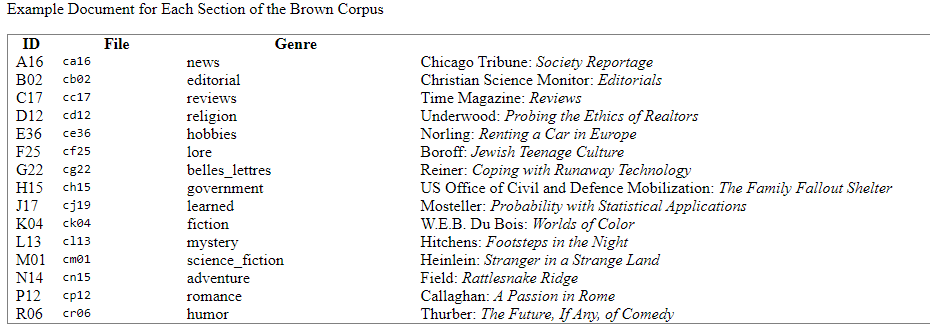

In [31]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [29]:
nltk.corpus.brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [46]:
print("Words in the whole Corpus : ", len(nltk.corpus.brown.words()))
news_text = nltk.corpus.brown.words(categories='news')
print("Sample Words in the news genre : ",news_text)

Words in the whole Corpus :  1161192
Sample Words in the news genre :  ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]


In [49]:
sents = nltk.corpus.brown.sents()
print("Sentences")
print(sents[0])
print(sents[1])

Sentences
['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']
['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']


In [38]:
fdist = nltk.FreqDist(w.lower() for w in news_text)
print("Frequency Distributon of News : ", fdist)
sample = ['can', 'could', 'may', 'might', 'must', 'will']
print("\n Frequency Distributon of Sample : ")
for m in sample:
    print(m + ':', fdist[m], end=' ')

Frequency Distributon of News :  <FreqDist with 13112 samples and 100554 outcomes>

 Frequency Distributon of Sample : 
can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

In [44]:
# Example comparison of Genres in use of certain works like verbs
# Observe most frequent word in our filter is will

cfd = nltk.ConditionalFreqDist((genre, word)
      for genre in nltk.corpus.brown.categories()
      for word in nltk.corpus.brown.words(categories=genre))
genres = ['humor','news', 'religion', 'hobbies', 'science_fiction', 'romance']
modals = ['fun', 'can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  fun   can could   may might  must  will 
          humor     3    16    30     8     8     9    13 
           news     3    93    86    66    38    50   389 
       religion     0    82    59    78    12    54    71 
        hobbies    13   268    58   131    22    83   264 
science_fiction     1    16    49     4    12     8    16 
        romance     1    74   193    11    51    45    43 
          humor     3    16    30     8     8     9    13 


# Section 2 - Text Processing : Few commonly used elements

### Stop Words and Unusal Words

In [92]:
nltk.download('stopwords')
lst_stopwords = stopwords.words('english')  #Print few examples
lst_stopwords[0:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

### All punctuation, numbers and other non-letter characters were removed, leaving only letters.

## Removing StopWords from a List or document

In [97]:
sample = "Welcome to NLP Basics Class. This class is about learning NLP For Business Application"
sample_tokens = nltk.tokenize.word_tokenize(sample)

processed_tokens = [w for w in sample_tokens if w not in lst_stopwords]
print(sample_tokens)
print(processed_tokens) # Not stopwords like 'to', 'is','about' etc. are removed

['Welcome', 'to', 'NLP', 'Basics', 'Class', '.', 'This', 'class', 'is', 'about', 'learning', 'NLP', 'For', 'Business', 'Application']
['Welcome', 'NLP', 'Basics', 'Class', '.', 'This', 'class', 'learning', 'NLP', 'For', 'Business', 'Application']


In [103]:
# In the above 'For' was not removed as an example - So convert to lowercase and test
sample = "Welcome to NLP Basics Class. This class is about learning NLP For Business Application"
sample_lower = sample.lower()

sample_tokens = nltk.tokenize.word_tokenize(sample_lower)
processed_tokens = [w for w in sample_tokens if w not in lst_stopwords]
print(sample_tokens)
print(processed_tokens) # Now 'For' also should be removed.

['welcome', 'to', 'nlp', 'basics', 'class', '.', 'this', 'class', 'is', 'about', 'learning', 'nlp', 'for', 'business', 'application']
['welcome', 'nlp', 'basics', 'class', '.', 'class', 'learning', 'nlp', 'business', 'application']


## WORDNET - Semantically oriented list, Lemmas
*   WordNet is a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure.
*   NLTK includes the English WordNet: 155,287 words and 117,659 synonym sets.
*   A synset is a "synonym set" i.e. a collection of synonymous words (or "lemmas"). Examples : The entity car.n.01 is called a

In [63]:
nltk.download('wordnet')
nltk.corpus.wordnet.synsets('motorcar')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[Synset('car.n.01')]

In [65]:
nltk.corpus.wordnet.synset('car.n.01').lemma_names()  #Other meanings for a Motorcar

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [66]:
nltk.corpus.wordnet.synsets('car')  # car has multiple synomouse sets

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [67]:
nltk.corpus.wordnet.synset('car.n.02').lemma_names()

['car', 'railcar', 'railway_car', 'railroad_car']

## Wordnet Hierarchy
Concepts linked together in a hierarchy
https://www.nltk.org/book/ch02.html

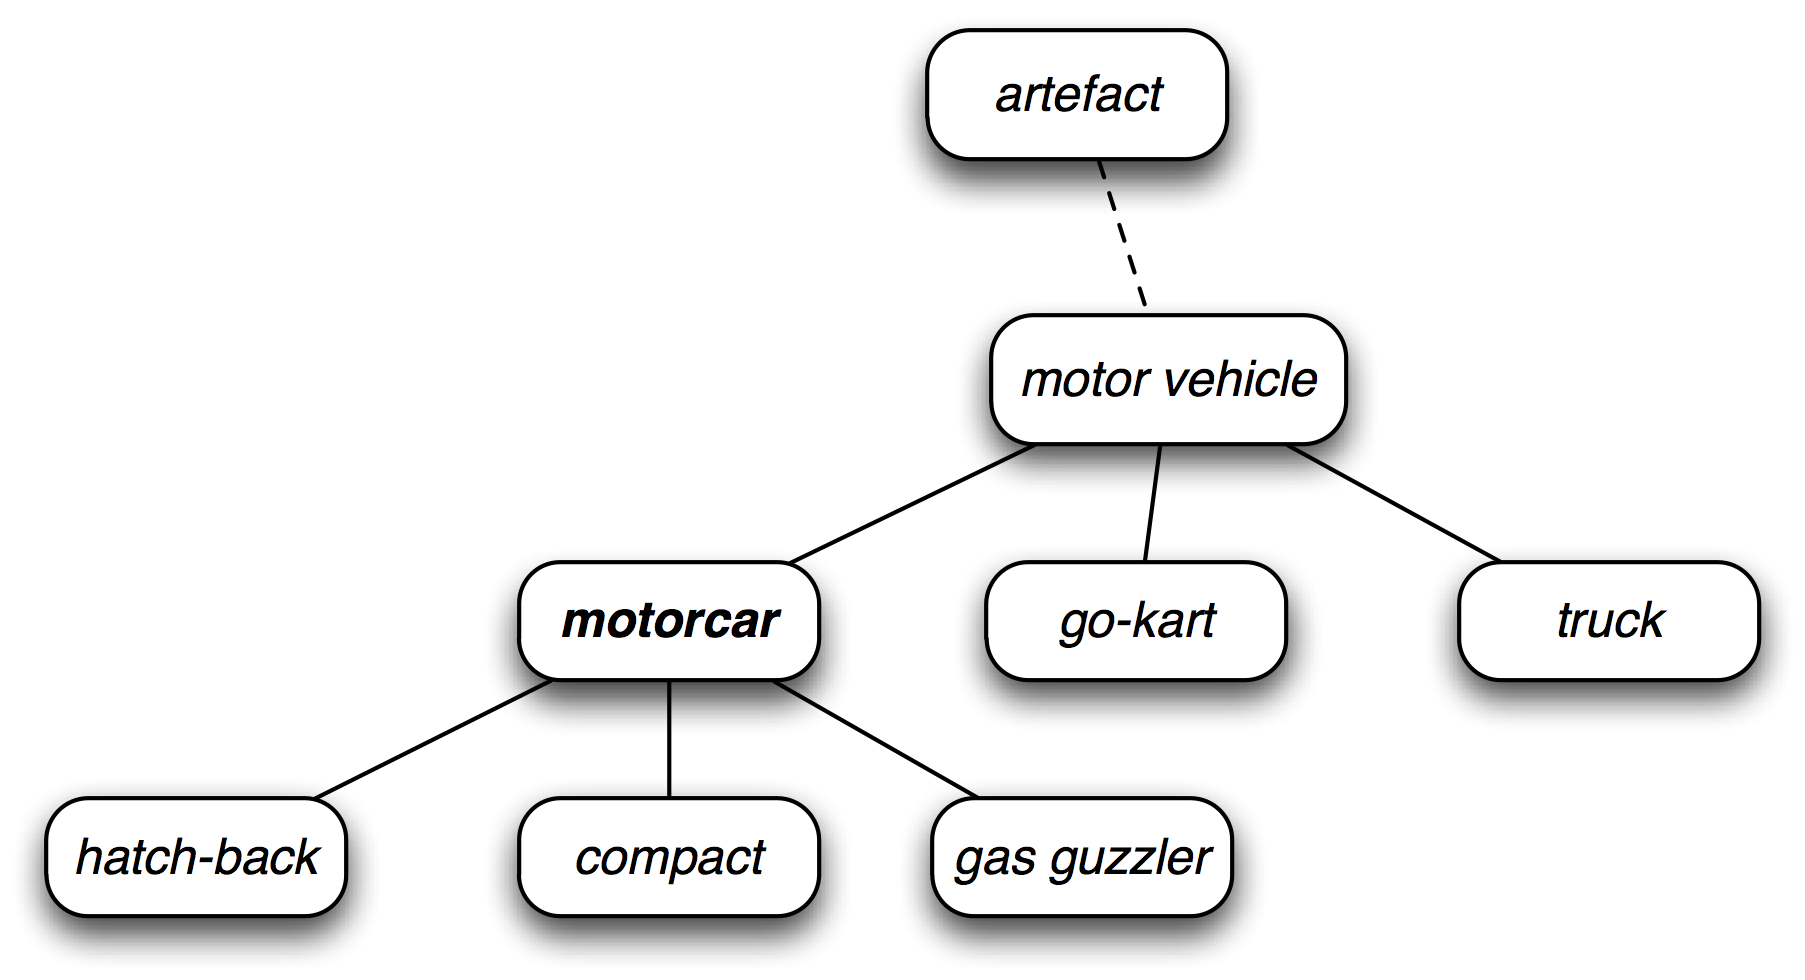

# Section 3 - Textual Processing : POS, Vectorisation

## Collocations, N-Grams
Collocations - words that frequently occur together

In [79]:
# nltk.corpus.wordnet.sents().collocations()
lst_bigrams = nltk.bigrams(['hello','world','how','are','you'])
for b in lst_bigrams:
    print(b)

('hello', 'world')
('world', 'how')
('how', 'are')
('are', 'you')


## Regular Expressions

In [84]:
import re
nltk.download('words')
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]
print(wordlist[0:10])

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


['a', 'aa', 'aal', 'aalii', 'aam', 'aardvark', 'aardwolf', 'aba', 'abac', 'abaca']


In [89]:
# Look for words with a pattenr. example words ending with 'ed'
# ^ caret symbol matches begining of a word and $ matches the end
#
reexample = [w for w in wordlist if re.search("ed$", w)]
print(reexample[0:10]) #Print few examples

['abaissed', 'abandoned', 'abased', 'abashed', 'abatised', 'abed', 'aborted', 'abridged', 'abscessed', 'absconded']


In [91]:
# Find all words with j in the middle as a pattern
reexample2 = [w for w in wordlist if re.search("^..j..$", w)]
print(reexample2[0:10]) #Print few examples

['adjag', 'anjan', 'arjun', 'bajan', 'bajra', 'bajri', 'bejan', 'bejel', 'bejig', 'bijou']


### Parts of a Speech

From the list of tags, here is the list of the most common items and their meaning:

1.   NNP: Noun, proper, singular
2.   NN: Noun, common, singular or mass
3.   IN: Preposition or conjunction, subordinating
4.   VBG: Verb, gerund or present participle
5.   VBN: Verb, past participle

In [106]:
from nltk.tag import pos_tag

sample = "Welcome to NLP Basics Class. This class is about learning NLP For Business Application"
sample_lower = sample.lower()
sample_tokens = nltk.tokenize.word_tokenize(sample_lower)

print(pos_tag(sample_tokens))

[('welcome', 'NN'), ('to', 'TO'), ('nlp', 'VB'), ('basics', 'NNS'), ('class', 'NN'), ('.', '.'), ('this', 'DT'), ('class', 'NN'), ('is', 'VBZ'), ('about', 'IN'), ('learning', 'VBG'), ('nlp', 'NN'), ('for', 'IN'), ('business', 'NN'), ('application', 'NN')]


# Section 4 - Stemming and Lemmatization

*   In context of text analytics, many tokens may have similar meaning example  'List, Lists, Listing' etc...may mean similar things. Therefore we don't want them to treat as different words.
*   Normailization is used - group together words with the same meaning but different forms.
*   Normalization in NLP is the process of converting a word to its canonical form. Explore Two popular techniques : Stemming and Lemmatization

### Stemming
Stemming Purely works with charactors or words and doesn't look at meaning

In [118]:
# Use Porter Stemmer as an example
from nltk.stem.porter import *
p_stemmer = PorterStemmer()

words = ['run','runner','running','ran','runs','easy','walked']
for word in words:
    print(word +' --> '+p_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easy --> easi
walked --> walk


In [119]:
# sample = "I like running. When one runs they feel refreshed. Have you run lately?"
for word in sample_tokens:
    print(word+' --> '+p_stemmer.stem(word))

i --> i
like --> like
running --> run
. --> .
when --> when
one --> one
runs --> run
they --> they
feel --> feel
refreshed --> refresh
. --> .
have --> have
you --> you
run --> run
lately --> late


### Lemmatizer
Lemmatization also aims to derive root work however it tries use meaning - morphological analysis to words. Example The lemma of mice is mouse and not some trucated word.
Note: A Stem may not be an actual word whereas lemma will be an actual language word

In [108]:
from nltk.stem.wordnet import WordNetLemmatizer

def fn_lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

# End of Lesson : NLP Basics
